<a href="https://colab.research.google.com/github/medaittouda/Iris-RIO-geometry/blob/main/HandRecognitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install opencv-python
!pip install opencv-python-headless
!pip install opencv-python-headless numpy matplotlib

In [35]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving hand.jpeg to hand.jpeg


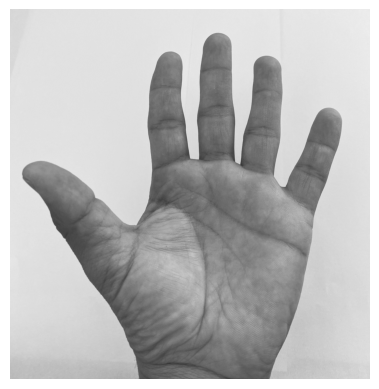

In [36]:
import cv2
import matplotlib.pyplot as plt

# Read the uploaded image
image = cv2.imread("hand.jpeg")

# Convert BGR to RGB (for matplotlib display)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [38]:


# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# 1. Image Capture and Upload (in Colab)
# The user needs to manually upload the image file.
uploaded = files.upload()
image_filename = list(uploaded.keys())[0]

# Load the image
img_bgr = cv2.imread(image_filename)

if img_bgr is None:
    print(f"Error: Could not load image from {image_filename}")
    # Handle the error, perhaps by exiting or using a placeholder
    exit()

# Convert the BGR image loaded by cv2 to RGB for matplotlib display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(f"Image successfully loaded: {image_filename}")



Saving hand.jpeg to hand (1).jpeg
Image successfully loaded: hand (1).jpeg


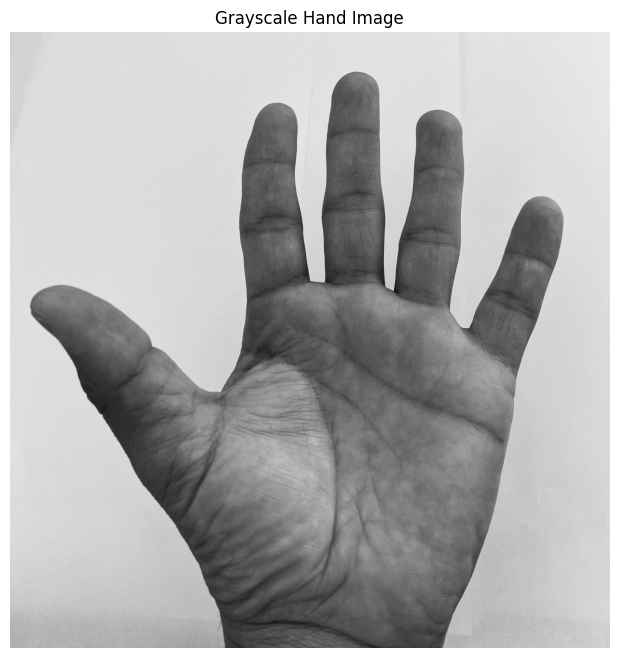

In [39]:
# 2. Image Processing: Convert to Grayscale
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using Matplotlib
# This is crucial for the manual selection step.
plt.figure(figsize=(10, 8))
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Hand Image")
plt.axis('off') # Hide axes for a cleaner view
plt.show()

# Optional: To further simplify, you could apply a binary threshold
# _, black_white_image = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)
# plt.figure(figsize=(10, 8)); plt.imshow(black_white_image, cmap='gray'); plt.title("Black and White Image"); plt.show()
# For manual measurement, grayscale often provides better visual context.


In [40]:
def euclidean_distance(p1, p2):
    """Calculates the Euclidean distance between two points (p1, p2)."""
    # p1 = (x1, y1), p2 = (x2, y2)
    return np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

# Structure to hold the feature data
FINGERS = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
measurements = {}

print("\n--- Start Manual Feature Measurement ---")
print("Instructions: Use the grayscale image displayed above.")
print("The measurements are in PIXELS.")
print("Enter coordinates (x, y) for the required points for each finger.")
print("x is the horizontal position, y is the vertical position.")

for finger in FINGERS:
    print(f"\n--- Measuring: {finger} ---")

    # ------------------- Length Measurement -------------------
    # Point 1: Tip of the finger
    tip_x = int(input(f"Enter x-coordinate for {finger} TIP: "))
    tip_y = int(input(f"Enter y-coordinate for {finger} TIP: "))
    p_tip = (tip_x, tip_y)

    # Point 2: Base of the finger (metacarpophalangeal joint)
    base_x = int(input(f"Enter x-coordinate for {finger} BASE (at palm): "))
    base_y = int(input(f"Enter y-coordinate for {finger} BASE (at palm): "))
    p_base = (base_x, base_y)

    length = euclidean_distance(p_tip, p_base)
    print(f"{finger} Length (Tip to Base): {length:.2f} pixels")

    # ------------------- Width Measurement -------------------

    # Width at Base (2 points, left and right of the base line)
    base_w_L_x = int(input(f"Enter x-coordinate for {finger} BASE WIDTH (Left side): "))
    base_w_L_y = int(input(f"Enter y-coordinate for {finger} BASE WIDTH (Left side): "))
    p_base_w_L = (base_w_L_x, base_w_L_y)

    base_w_R_x = int(input(f"Enter x-coordinate for {finger} BASE WIDTH (Right side): "))
    base_w_R_y = int(input(f"Enter y-coordinate for {finger} BASE WIDTH (Right side): "))
    p_base_w_R = (base_w_R_x, base_w_R_y)

    width_base = euclidean_distance(p_base_w_L, p_base_w_R)
    print(f"{finger} Width at Base: {width_base:.2f} pixels")

    # Width at Midpoint (2 points, left and right of the midpoint)
    # Note: Midpoint is halfway between Tip and Base
    mid_w_L_x = int(input(f"Enter x-coordinate for {finger} MIDPOINT WIDTH (Left side): "))
    mid_w_L_y = int(input(f"Enter y-coordinate for {finger} MIDPOINT WIDTH (Left side): "))
    p_mid_w_L = (mid_w_L_x, mid_w_L_y)

    mid_w_R_x = int(input(f"Enter x-coordinate for {finger} MIDPOINT WIDTH (Right side): "))
    mid_w_R_y = int(input(f"Enter y-coordinate for {finger} MIDPOINT WIDTH (Right side): "))
    p_mid_w_R = (mid_w_R_x, mid_w_R_y)

    width_mid = euclidean_distance(p_mid_w_L, p_mid_w_R)
    print(f"{finger} Width at Midpoint: {width_mid:.2f} pixels")

    # Store the measurements
    measurements[finger] = {
        'length': length,
        'width_base': width_base,
        'width_mid': width_mid
    }

print("\n--- Measurement Data Collection Complete ---")



--- Start Manual Feature Measurement ---
Instructions: Use the grayscale image displayed above.
The measurements are in PIXELS.
Enter coordinates (x, y) for the required points for each finger.
x is the horizontal position, y is the vertical position.

--- Measuring: Thumb ---
Enter x-coordinate for Thumb TIP: 350
Enter y-coordinate for Thumb TIP: 345
Enter x-coordinate for Thumb BASE (at palm): 320
Enter y-coordinate for Thumb BASE (at palm): 330
Thumb Length (Tip to Base): 33.54 pixels
Enter x-coordinate for Thumb BASE WIDTH (Left side): 335
Enter y-coordinate for Thumb BASE WIDTH (Left side): 349
Enter x-coordinate for Thumb BASE WIDTH (Right side): 350
Enter y-coordinate for Thumb BASE WIDTH (Right side): 345
Thumb Width at Base: 15.52 pixels
Enter x-coordinate for Thumb MIDPOINT WIDTH (Left side): 350
Enter y-coordinate for Thumb MIDPOINT WIDTH (Left side): 329
Enter x-coordinate for Thumb MIDPOINT WIDTH (Right side): 347
Enter y-coordinate for Thumb MIDPOINT WIDTH (Right side): 

In [41]:
# 4. Data Analysis

# Prepare lists for easier calculation (excluding the Thumb, as it often varies significantly)
lengths = []
widths_base = []
widths_mid = []

print("\n## 📊 Raw Feature Data (in Pixels)")
for finger, data in measurements.items():
    print(f"| {finger:<6} | Length: {data['length']:.2f} | Base Width: {data['width_base']:.2f} | Mid Width: {data['width_mid']:.2f} |")
    if finger != 'Thumb': # Often excluded from 'finger' averages
        lengths.append(data['length'])
        widths_base.append(data['width_base'])
        widths_mid.append(data['width_mid'])

# Calculate Averages (excluding Thumb)
avg_length = np.mean(lengths)
avg_width_base = np.mean(widths_base)
avg_width_mid = np.mean(widths_mid)

print("\n## 📈 Analysis and Averages (Index, Middle, Ring, Pinky)")
print(f"Average Finger Length: {avg_length:.2f} pixels")
print(f"Average Finger Width (Base): {avg_width_base:.2f} pixels")
print(f"Average Finger Width (Midpoint): {avg_width_mid:.2f} pixels")

# Variation Analysis (e.g., comparing individual fingers to the average)
print("\n### Variation Analysis (Difference from Average Length)")
for finger in FINGERS:
    if finger != 'Thumb':
        length = measurements[finger]['length']
        variation = length - avg_length
        print(f"{finger}: {variation:+.2f} pixels {'(Longer)' if variation > 0 else '(Shorter)' if variation < 0 else '(Average)'}")

# Comparison of width ratios
width_ratio_avg = avg_width_base / avg_width_mid
print(f"\nAverage Finger Taper Ratio (Base Width / Mid Width): {width_ratio_avg:.2f}")

print("\n✅ Task Complete.")


## 📊 Raw Feature Data (in Pixels)
| Thumb  | Length: 33.54 | Base Width: 15.52 | Mid Width: 19.24 |
| Index  | Length: 14.14 | Base Width: 20.00 | Mid Width: 26.25 |
| Middle | Length: 42.43 | Base Width: 42.43 | Mid Width: 22.36 |
| Ring   | Length: 0.00 | Base Width: 30.00 | Mid Width: 36.24 |
| Pinky  | Length: 10.00 | Base Width: 0.00 | Mid Width: 29.00 |

## 📈 Analysis and Averages (Index, Middle, Ring, Pinky)
Average Finger Length: 16.64 pixels
Average Finger Width (Base): 23.11 pixels
Average Finger Width (Midpoint): 28.46 pixels

### Variation Analysis (Difference from Average Length)
Index: -2.50 pixels (Shorter)
Middle: +25.78 pixels (Longer)
Ring: -16.64 pixels (Shorter)
Pinky: -6.64 pixels (Shorter)

Average Finger Taper Ratio (Base Width / Mid Width): 0.81

✅ Task Complete.
